In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pl

In [72]:
fichier = pd.read_csv("twittercomment.csv", engine = 'python')
fichier

,label,tweet_id,date,query,user_name,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


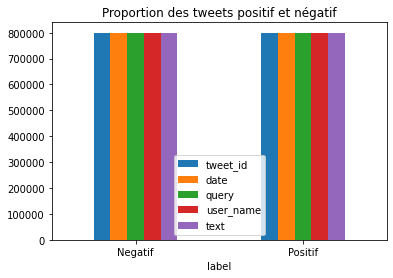

In [73]:
ax = fichier.groupby('label').count().plot(kind='bar', title='Proportion des tweets positif et négatif',legend=True)
ax.set_xticklabels(['Negatif','Positif'], rotation=0)
text, sentiment = list(fichier['text']), list(fichier['label'])

<AxesSubplot:xlabel='label', ylabel='count'>

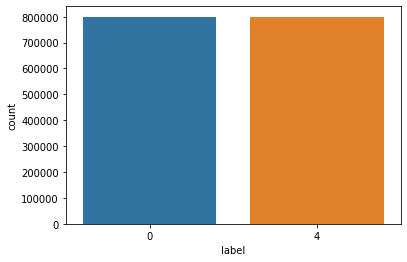

In [74]:
import seaborn as sns
sns.countplot(x='label', data=fichier)

**Data Preprocessing**

Selecting the text and Target column for our further analysis

In [75]:
data=fichier[['text','label']]

Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)

In [76]:
data['label'] = data['label'].replace(4,1)

<ipython-input-76-1a389a2fd975>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].replace(4,1)


Separating positive and negative tweets

In [77]:
data_pos = data[data['label'] == 1]
data_neg = data[data['label'] == 0]

On prend 1/4 des données (au lieu des 1.6 millions)

In [78]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

Combining positive and negative tweets
Making statement text in lower case

In [79]:
dataset = pd.concat([data_pos, data_neg])
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

19995    not much time off this weekend, work trip to m...
19996                            one more day of holidays 
19997    feeling so down right now .. i hate you damn h...
19998    geez,i hv to read the whole book of personalit...
19999    i threw my sign at donnie and he bent over to ...
Name: text, dtype: object

Définission d'une liste des mots courrant Anglais, qui n'ont pas de valeur ajouter.

In [80]:
stopwordlist = [
    'a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
    'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
    'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
    'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
    'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
    'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
    'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
    'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
    'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s',
    'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
    'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
    'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
    'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
    'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
    'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
    "youve", 'your', 'yours', 'yourself', 'yourselves'
    ]

Nettoyage et suppression de la liste de mots (ci-dessus) sur le texte du tweet

In [81]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

Enlever les ponctuations

In [82]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malm� fris...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

Mettre les mots restants dans une liste

In [83]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

800000           []
800001          [w]
800002    [w, w, w]
800003           []
800004           []
Name: text, dtype: object

In [84]:
fichier.head()

,label,tweet_id,date,query,user_name,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [85]:
fichier['Month'] = pd.DatetimeIndex(fichier['date']).month

C:\Users\benpr\AppData\Roaming\Python\Python39\site-packages\dateutil\parser\_parser.py:1213: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [86]:
fichier['year'] = pd.DatetimeIndex(fichier['date']).year

In [87]:
#fichier['hours'] = pd.DatetimeIndex(fichier['date']).hours
#fichier['hours'] = fichier.index.to_series().apply(lambda x: x.hour))
#fichier['hour'] = fichier.index.hour
#fichier['hour'] = fichier['date'].dt.hour
#fichier['hours'] = pd.to_datetime(fichier['date'], errors='coerce')
#fichier['hours'] = pd.to_datetime(fichier['date'], format='H')
#fichier['hours'] = fichier['date'].dt.strftime('%Y-%m-%d %H')
#fichier['hour'] = pd.to_datetime(fichier['hours'] ,errors = 'coerce',format = '%Y-%m-%d %H').dt.strftime("%H%")

In [88]:
fichier.head()

,label,tweet_id,date,query,user_name,text,Month,year
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",4,2009
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,4,2009
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,4,2009
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,4,2009
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",4,2009


C:\Users\benpr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='count'>

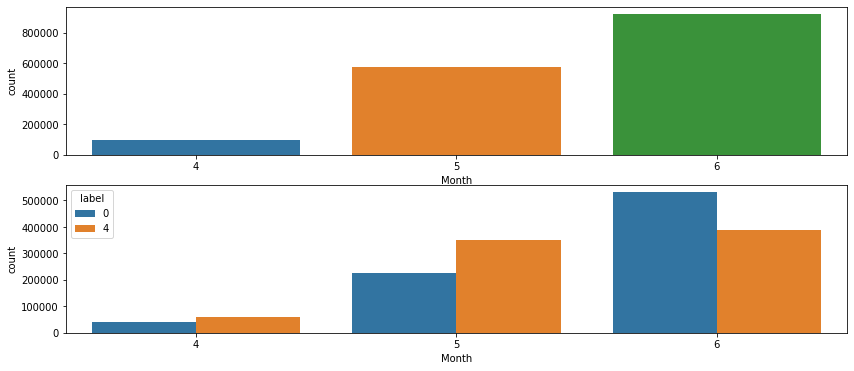

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.subplot(211)
sns.countplot("Month",data=fichier)
plt.subplot(212)
sns.countplot(x= "Month",hue='label',data=fichier)

<AxesSubplot:xlabel='year', ylabel='count'>

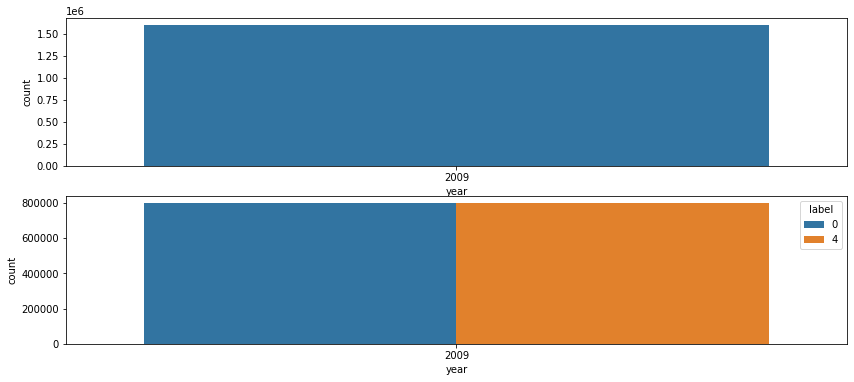

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
plt.subplot(211)
sns.countplot("year",data=fichier)
plt.subplot(212)
sns.countplot(x= "year",hue='label',data=fichier)

C:\Users\benpr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: Could not interpret input 'weekday'

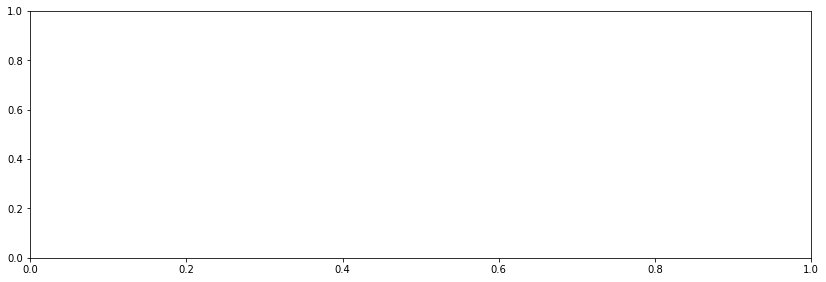

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,10))
plt.subplot(211)
sns.countplot("weekday",data=fichier)
plt.subplot(212)
sns.countplot(x= "weekday",hue='label',data=fichier)